                       Step Temp TotEng Press c_p_all 
0           0            1   -3.9430637    3.177189...
1         200   0.99823903   -4.1052816    2.159447...
2         400    1.0357248   -4.1147139    2.146178...
3         600    1.0082116   -4.1116627    2.284965...
4         800   0.97582854   -4.1677463    2.489264...
..                                                 ...
96      19200    1.0152847   -4.0971631    2.320155...
97      19400    1.0613907   -4.0812377    2.098136...
98      19600    1.0828455   -4.1723575    1.576728...
99      19800   0.95555256   -4.1180221    2.678183...
100     20000   0.98539293   -4.1427251    2.245458...

[101 rows x 1 columns]
(101, 1)


In [5]:
# Зависимость энергии и вириального давления от временпи
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics

# Предобработка файлов
initial_files = ["berendsen_cut.txt", "langevin_cut.txt", "mcnvt_cut.txt", "mdnvt_cut.txt"]
files = ["berendsen.txt", "langevin.txt", "mcnvt.txt", "mdnvt.txt"]

for i in range(4):
    f_write = open(files[i], 'w')
    with open(initial_files[i], 'r') as f_read:
        for line in f_read.readlines():
            new_line = ','.join(line.split())
            a = f_write.write(new_line)
            b = f_write.write('\n')
        f_write.close()
                
Data = []

for i in range(4):
    data = pd.read_csv(files[i])
    Data.append(data)
print(Data)
# Массив значений среднего вириального давления для четырех методов расчета
vp_av = [0, 0, 0, 0]
vp_av_1 = [0, 0, 0, 0]


# Массив погрешностей среднего вириального давления 
Delta = []
Energy_av = [0, 0, 0, 0]
Energy_delta = []

for i in range(4):
    vp_av[i] = statistics.mean(Data[i]['c_p_all'])
    vp_av_1[i] = np.mean(Data[i]['c_p_all'])
    Energy_av[i] = statistics.mean(Data[i]['TotEng'])
    sum = 0
    sum_energy = 0
    for k in range(len(Data[i]['c_p_all'])):
        a = (Data[i]['c_p_all'][k] - vp_av[i]) ** 2
        b = len(Data[i]['c_p_all']) * (len(Data[i]['c_p_all']) - 1)
        a_energy = (Data[i]['TotEng'][k] - Energy_av[i]) ** 2
        b_energy = len(Data[i]['TotEng']) * (len(Data[i]['TotEng']) - 1)
        sum = sum + a/b
        sum_energy = sum_energy + a_energy/b_energy 
    delta = math.sqrt(sum)
    delta_energy = math.sqrt(sum_energy)
    Delta.append(delta)
    Energy_delta.append(delta_energy)
    
print(vp_av)
print(vp_av_1)
print(Delta)
print("Energy av:", Energy_av)
print("Delta Energy av:", Energy_delta)



[      Step      Temp    TotEng     Press   c_p_all
0        0  1.000000 -3.943064  3.177189  2.339743
1      200  0.998239 -4.105282  2.159448  1.323476
2      400  1.035725 -4.114714  2.146179  1.278815
3      600  1.008212 -4.111663  2.284966  1.440642
4      800  0.975829 -4.167746  2.489264  1.672060
..     ...       ...       ...       ...       ...
96   19200  1.015285 -4.097163  2.320155  1.469909
97   19400  1.061391 -4.081238  2.098137  1.209279
98   19600  1.082845 -4.172357  1.576729  0.669904
99   19800  0.955553 -4.118022  2.678184  1.877960
100  20000  0.985393 -4.142725  2.245459  1.420245

[101 rows x 5 columns],       Step      Temp    TotEng     Press   c_p_all
0        0  0.985393 -4.142725  2.245459  1.420245
1      200  1.069144 -4.078152  2.105447  1.210096
2      400  0.936060 -4.083243  2.726969  1.943068
3      600  1.017670 -4.164057  1.881248  1.029003
4      800  1.080661 -4.107978  1.871186  0.966190
..     ...       ...       ...       ...       ...
96   

THE END!
[[-5.437224484158416, -4.639600320792079, -2.9194637376237624, -1.7555342089108912, 0.4768447068316832], [-5.435112893069307, -4.651652542574258, -2.9347410316831684, -1.7662353712871286, 0.43524455754455443], [-5.439808915841584, -4.6291155336633665, -2.9013238217821784, -1.7323867992079207, 0.4902480495247525], [-5.450991797029703, -4.6291155336633665, -2.9013238217821784, -1.7323867992079207, 0.4902480495247525]]
Теполемость, расчитанная из E_T: [2.361264689623404, 2.3469709618350234, 2.3670976045688135, 2.370081958561615]
[0.0005016717986214637, 0.020127259855946836, 0.018045319730458625, 0.01823560346992425]


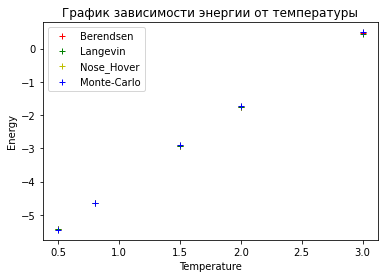

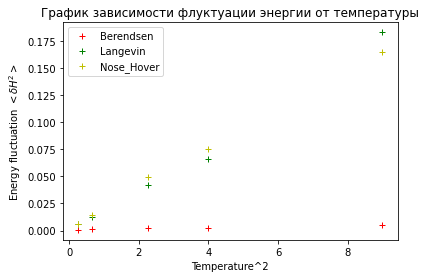

In [10]:
# Зависимость энергии системы от температуры (определение теплоемкости)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics

Energy_05_initial = ['berendsen_05.txt', 'langevin_05.txt', 'mdnvt_05.txt', 'mcnvt_05.txt']
Energy_08_initial = ['berendsen_08.txt', 'langevin_08.txt', 'mdnvt_08.txt', 'mcnvt_08.txt']
Energy_15_initial = ['berendsen_15.txt', 'langevin_15.txt', 'mdnvt_15.txt', 'mcnvt_15.txt']
Energy_20_initial = ['berendsen_20.txt', 'langevin_20.txt', 'mdnvt_20.txt', 'mcnvt_20.txt']
Energy_30_initial = ['berendsen_30.txt', 'langevin_30.txt', 'mdnvt_30.txt', 'mcnvt_30.txt']
Energy_arr_initial = [Energy_05_initial, Energy_08_initial, Energy_15_initial, Energy_20_initial, Energy_30_initial]

Energy_05_final  = ['berendsen_05_final.txt', 'langevin_05_final.txt', 'mdnvt_05_final.txt', 'mcnvt_05_final.txt']
Energy_08_final  = ['berendsen_08_final.txt', 'langevin_08_final.txt', 'mdnvt_08_final.txt', 'mcnvt_08_final.txt']
Energy_15_final  = ['berendsen_15_final.txt', 'langevin_15_final.txt', 'mdnvt_15_final.txt', 'mcnvt_15_final.txt']
Energy_20_final  = ['berendsen_20_final.txt', 'langevin_20_final.txt', 'mdnvt_20_final.txt', 'mcnvt_20_final.txt']
Energy_30_final  = ['berendsen_30_final.txt', 'langevin_30_final.txt', 'mdnvt_30_final.txt', 'mcnvt_30_final.txt']
Energy_arr_final = [Energy_05_final, Energy_08_final, Energy_15_final, Energy_20_final, Energy_30_final]

# k - температура
# t - термостат
for k in range(5):
    for t in range(4):
        counter = 0
        f_write = open(Energy_arr_final[k][t], 'w')
        with open(Energy_arr_initial[k][t], 'r') as f_read:
            for line in f_read.readlines():
                if (counter > 2 and counter < 105):
                    new_line = ','.join(line.split())
                    a = f_write.write(new_line)
                    b = f_write.write('\n')
                counter = counter + 1
            f_write.close()     
            
print("THE END!")

Energy_berendsen = []
Energy_langevin = []
Energy_mdnvt = []
Energy_mcnvt = []

Energy_average = [Energy_berendsen, Energy_langevin, Energy_mdnvt, Energy_mcnvt]

data0 = []
data1 = []
data2 = []
data3 = []
data4 = []
Data = [data0, data1, data2, data3, data4]


for k in range(5):
    for t in range(4):
        #print('k:', k, "t:", t)
        #print(Energy_arr_final[k][t])
        Data[k].append(pd.read_csv(Energy_arr_final[k][t]))
        mean_energy_temp = statistics.mean(Data[k][t]['TotEng'])
        Energy_average[t].append(mean_energy_temp)

print(Energy_average)

Temperature = [0.5, 0.8, 1.5, 2.0, 3.0]

# Построение графика зависимости энергии системы от температуры
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Energy')
ax1.plot(Temperature, Energy_average[0], '+', color = 'r', label = 'Berendsen', )
ax1.plot(Temperature, Energy_average[1], '+', color = 'g', label = 'Langevin')
ax1.plot(Temperature, Energy_average[2], '+', color = 'y', label = 'Nose_Hover')
ax1.plot(Temperature, Energy_average[3], '+', color = 'b', label = 'Monte-Carlo')
ax1.legend()
ax1.set_title('График зависимости энергии от температуры')
plt.savefig('E_k.pdf')

from pylab import * 

# Массив теплоемкостей для разных темодов термостатирования (найдены из графика)
C = []

for i in range(4):
    x = Temperature
    y = Energy_average[i]
    # y = m * x + b
    m, b = polyfit(x, y, 1)
    C.append(m)
print("Теполемость, расчитанная из E_T:", C)

# Теплоемкость через флуктуации энергии

# массив флуктуций энергии для различных методов термостаттирования и различных температур

delta_Energy_berendsen = []
delta_Energy_langevin = []
delta_Energy_mdnvt = []
delta_Energy_mcnvt = []

delta_Energy = [delta_Energy_berendsen, delta_Energy_langevin, delta_Energy_mdnvt, delta_Energy_mcnvt]
for k in range(5):
    for t in range(4):
        #print('k:', k, "t:", t)
        #print(Energy_arr_final[k][t])
        Data[k].append(pd.read_csv(Energy_arr_final[k][t]))
        mean_energy_temp = statistics.mean(Data[k][t]['TotEng']) * statistics.mean(Data[k][t]['TotEng'])
        mean_energy_squared_temp = statistics.mean(Data[k][t]['TotEng'] * Data[k][t]['TotEng'])
        a1 = mean_energy_temp
        a2 = mean_energy_squared_temp
        delta_Energy[t].append(a2 - a1)

#print(delta_Energy)

# Массив квадратов температур
Temperature_2 = [0.25, 0.64, 2.25, 4, 9]

fig, ax1 = plt.subplots() 
ax1.set_xlabel('Temperature^2')
ax1.set_ylabel('Energy fluctuation $<\delta H^{2}>$')

ax1.plot(Temperature_2, delta_Energy[0], '+', color = 'r', label = 'Berendsen', )
ax1.plot(Temperature_2, delta_Energy[1], '+', color = 'g', label = 'Langevin')
ax1.plot(Temperature_2, delta_Energy[2], '+', color = 'y', label = 'Nose_Hover')
#ax1.plot(Temperature_2, delta_Energy[3], '+', color = 'b', label = 'Monte-Carlo')
ax1.legend()
ax1.set_title('График зависимости флуктуации энергии от температуры')
plt.savefig('delta_E_T.pdf')
  


# Опредление теплоемкости из флкутуаций
C_fluct = []
for i in range(4):
    x = Temperature_2
    y = delta_Energy[i]
    # y = m * x + b
    m, b = polyfit(x, y, 1)
    C_fluct.append(m)
print(C_fluct)

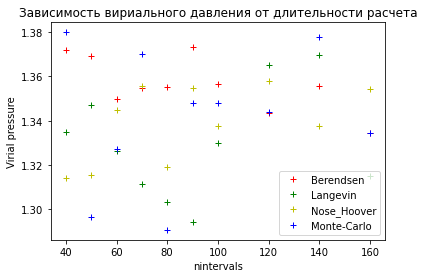

In [7]:
# Проверим, сходятся ли значения вириального давления, полученные различными методами термостатирования, 
# если увеличивать длину расчета. 

intervals = [40, 50, 60, 70, 80, 90, 100, 120, 140, 160]
v_p_berendsen = [1.3720, 1.3694, 1.3497, 1.3546, 1.3550, 1.3734, 1.3567, 1.3435,  1.3557, 1.3345]
v_p_langevin = [1.3349, 1.3469, 1.3262 , 1.3116, 1.3034, 1.2941, 1.3301, 1.3653 , 1.3695, 1.3152]
v_p_mcnvt = [1.3141, 1.3157, 1.3446, 1.3556, 1.3191, 1.3549, 1.3376, 1.3577, 1.3376, 1.3543 ]
v_p_mdnvt = [1.3799, 1.2967, 1.3270, 1.3703, 1.2907, 1.3481, 1.3479, 1.3437, 1.3776, 1.3345]

v_p = [v_p_berendsen, v_p_langevin, v_p_mcnvt, v_p_mdnvt]

fig, ax2 = plt.subplots() 
ax2.set_xlabel('nintervals')
ax2.set_ylabel('Virial pressure')

ax2.plot(intervals, v_p[0], '+', color = 'r', label = 'Berendsen', )
ax2.plot(intervals, v_p[1], '+', color = 'g', label = 'Langevin')
ax2.plot(intervals, v_p[2], '+', color = 'y', label = 'Nose_Hoover')
ax2.plot(intervals, v_p[3], '+', color = 'b', label = 'Monte-Carlo')
ax2.legend()
ax2.set_title('Зависимость вириального давления от длительности расчета')
plt.savefig('vp_step.pdf')




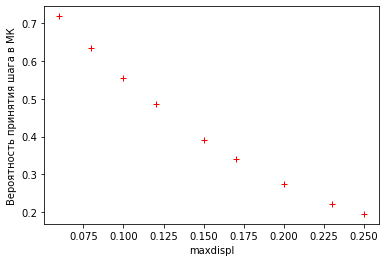

In [7]:
# График зависимости вероятности принятия пробного шага от максимальной величины пробного смещения

displ = [0.06, 0.08, 0.10, 0.12, 0.15, 0.17, 0.20, 0.23, 0.25]
probability = [0.719, 0.635 , 0.556, 0.486, 0.392, 0.340, 0.275, 0.221 , 0.195]
fig, ax3 = plt.subplots() 
ax3.set_xlabel('maxdispl')
ax3.set_ylabel('Вероятность принятия шага в МК')

ax3.plot(displ, probability, '+', color = 'r' )
plt.savefig('P_displ.pdf')

